# Image Compression

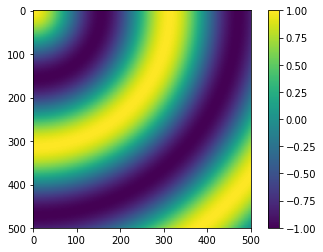

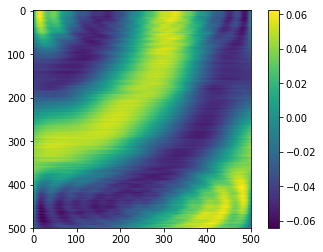

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv("http://www-personal.umich.edu/~mejn/cp/data/circular.txt", delimiter=" ")
data.dropna(axis=1, inplace=True)
data = np.array(data)

x = np.linspace(0, 1, data.shape[0])
y = np.linspace(0, 1, data.shape[1])
c = np.fft.fft(data)

for i in range(c.shape[0]):
    for j in range(c.shape[1]):
        c[i,j] = np.round(c[i,j] * .05)

# square_size = 10
# for i in range(0, c.shape[0] - square_size, square_size):
#     for j in range(0, c.shape[1] - square_size, square_size):
#         max_c = c[i,j]
#         for a in range(0, square_size, 1):
#             for b in range(0, square_size, 1):
#                 if c[i+a,j+b] >= max_c:
#                     max_c = c[i+a,j+b]
#                     max_i = i+a
#                     max_j = j+b
#         c[i:i+square_size,j:j+square_size].real *= 1/2
#         c[max_i,max_j] = max_c


y = np.fft.ifft(c)

plt.figure(1)
plt.imshow(data)
plt.colorbar()
plt.figure(2)
plt.imshow(y.real)
plt.colorbar()

Original image png file size: 83,347 bytes

Modified image png file size: 65,726 bytes

Percent reduction: 21.14%

# Sound Processing

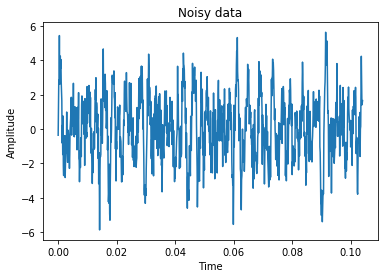

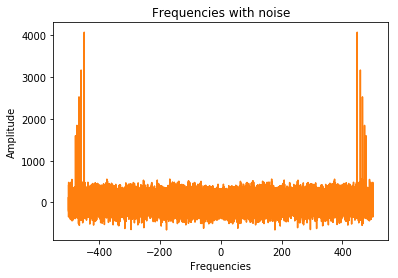

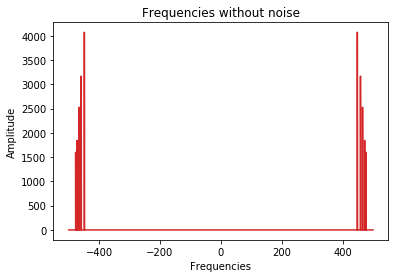

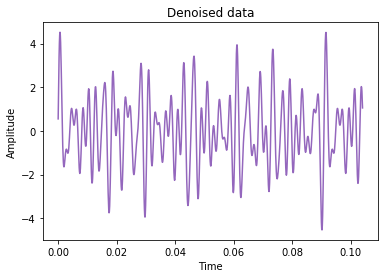

In [167]:
import wave
import struct

f = lambda x: np.sin(2*np.pi*220*x) + np.sin(2*np.pi*264*x) + np.sin(2*np.pi*330*x) + np.sin(2*np.pi*396*x) + np.sin(2*np.pi*495*x)
N = 48000
x = np.linspace(0, 5, N)
y = f(x)
for i in range(N):
    y[i] += np.random.randn()

plt.figure(0)
plt.plot(x[:1000], y[:1000])
plt.title("Noisy data")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# setup wave file
wave_file = wave.open("wave_file.wav", 'w')
wave_file.setnchannels(1)
wave_file.setsampwidth(2)
wave_file.setframerate(N)
wave_file.setnframes(N)
wave_file.setcomptype("NONE", "no compression")
for s in y:
    wave_file.writeframes(struct.pack('h', int(s*4000)))
wave_file.close()
    
# remove noise
y = np.fft.fft(y)
plt.figure(1)
plt.plot(np.linspace(-500, 500, N), y.real, "tab:orange")
plt.title("Frequencies with noise")
plt.xlabel("Frequencies")
plt.ylabel("Amplitude")

for i in range(N):
    if y[i] < 1000:
        y[i] = 0
plt.figure(2)
plt.plot(np.linspace(-500, 500, N), y.real, "tab:red")
plt.title("Frequencies without noise")
plt.xlabel("Frequencies")
plt.ylabel("Amplitude")

y = np.fft.ifft(y)
plt.figure(3)
plt.plot(x[:1000], y.real[:1000], "tab:purple")
plt.title("Denoised data")
plt.xlabel("Time")
plt.ylabel("Amplitude")

# setup denoised wave file
wave_file_denoised = wave.open("wave_file_denoised.wav", 'w')
wave_file_denoised.setnchannels(1)
wave_file_denoised.setsampwidth(2)
wave_file_denoised.setframerate(N)
wave_file_denoised.setnframes(N)
wave_file_denoised.setcomptype("NONE", "no compression")
for s in y.real:
    wave_file_denoised.writeframes(struct.pack('h', int(s*4000)))
wave_file_denoised.close()
